In [88]:
from scipy.io import arff
import pandas as pd
from GAN import GAN

from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Diabetes

In [131]:
scaler = StandardScaler()

data = arff.loadarff('Assignment 4 files/diabetes.arff')
df = pd.DataFrame(data[0])
to_norm = df.columns.values[:-1]
original_df = df.copy()
df['class'] = df['class'].apply(lambda x: x.decode("utf-8"))
df['class'] = df['class'].astype('category')
df['class'] = df['class'].cat.codes
class_col = df['class']
df = df.drop(columns=['class'], axis=1)
scaler = MinMaxScaler()
scaler.fit(df.values)
df = pd.DataFrame(scaler.transform(df.values), columns=df.columns)
df = pd.concat([df, class_col],axis=1)
df

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1
...,...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000,0
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000,0
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000,0
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333,1


In [90]:
#Define the GAN and training parameters
noise_dim = 5
dim = 10
batch_size = 32

log_step = 100
epochs = 5001
learning_rate = 5e-4
models_dir = 'model_diabetes'

print(df.shape[1])

gan_args = [batch_size, learning_rate, noise_dim, df.shape[1], dim]
train_args = ['', epochs, log_step]

model = GAN

#Training the GAN model chosen: Vanilla GAN, CGAN, DCGAN, etc.
synthesizer = model(gan_args)
history = synthesizer.train(df, train_args)

9
0 [D loss: 0.707104, acc.: 50.00%] [G loss: 0.665687]
generated_data
100 [D loss: 0.716084, acc.: 48.44%] [G loss: 0.654232]
generated_data
200 [D loss: 0.690805, acc.: 50.00%] [G loss: 0.739401]
generated_data
300 [D loss: 0.699221, acc.: 45.31%] [G loss: 0.737785]
generated_data
400 [D loss: 0.684905, acc.: 53.12%] [G loss: 0.684043]
generated_data
500 [D loss: 0.694055, acc.: 53.12%] [G loss: 0.706247]
generated_data
600 [D loss: 0.694387, acc.: 53.12%] [G loss: 0.697587]
generated_data
700 [D loss: 0.694693, acc.: 43.75%] [G loss: 0.708102]
generated_data
800 [D loss: 0.696003, acc.: 53.12%] [G loss: 0.696623]
generated_data
900 [D loss: 0.695122, acc.: 45.31%] [G loss: 0.681591]
generated_data
1000 [D loss: 0.692702, acc.: 51.56%] [G loss: 0.722212]
generated_data
1100 [D loss: 0.690382, acc.: 48.44%] [G loss: 0.691486]
generated_data
1200 [D loss: 0.703629, acc.: 42.19%] [G loss: 0.711586]
generated_data
1300 [D loss: 0.686670, acc.: 53.12%] [G loss: 0.687300]
generated_data
14

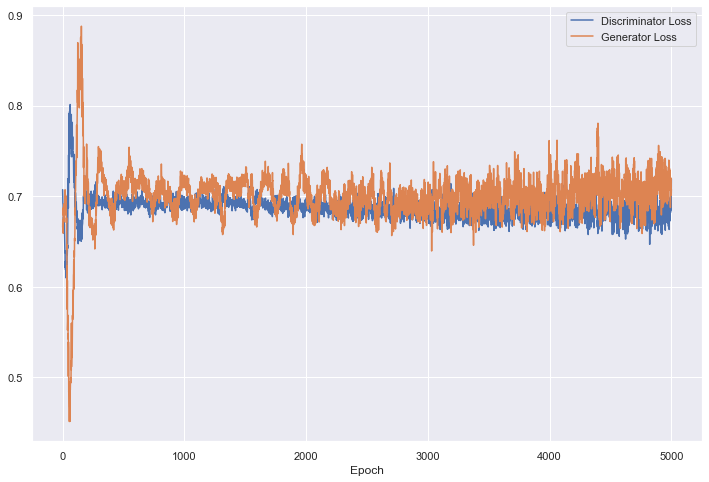

In [91]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(history['D_loss'], label='Discriminator Loss')
ax.plot(history['G_loss'], label='Generator Loss')
ax.set_xlabel('Epoch')
plt.legend()
plt.show()

In [92]:
from sklearn.decomposition import PCA

In [93]:
scalar = PCA(n_components=2, svd_solver='full')
scalar.fit(df.values)
X_embedded = scalar.transform(df.values)

In [94]:
X_embedded

array([[ 0.7069937 ,  0.15312978],
       [-0.40271091, -0.0881876 ],
       [ 0.68963127,  0.10496044],
       ...,
       [-0.34377156,  0.07261042],
       [ 0.62311372, -0.0179499 ],
       [-0.40738638, -0.17497506]])

In [95]:
len(df)

768

In [96]:
import matplotlib.pyplot as plt
import numpy as np


# Setup parameters visualization parameters
seed = 17
test_size = 100 # number of fraud cases

np.random.seed(seed)
z = np.random.normal(size=(test_size, noise_dim))
real = synthesizer.get_data_batch(train=df, batch_size=test_size, seed=seed)
real_samples = pd.DataFrame(real)

In [97]:
models = {'GAN': ['GAN', False, synthesizer.generator]}

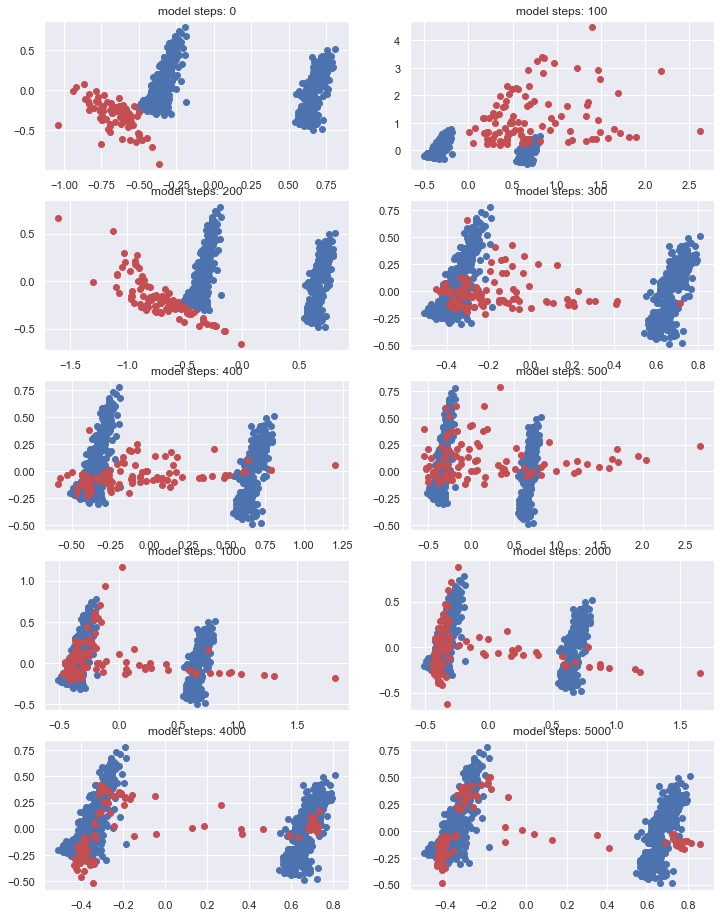

In [98]:
model_names = ['GAN']
colors = ['deepskyblue','blue']
markers = ['o','^']

col1, col2 = 'CITY', 'ETHNICITY'

base_dir = 'model/'

#Actual fraud data visualization
model_steps = [ 0, 100, 200, 300, 400, 500, 1000, 2000, 4000, 5000]
rows = len(model_steps)
columns = 5

axarr = [[]]*len(model_steps)



fig, ax = plt.subplots(5, 2, figsize=(12, 16))


for model_step_ix, model_step in enumerate(model_steps):      
    [model_name, with_class, generator_model] = models['GAN']
    generator_model.load_weights( base_dir + '_generator_model_weights_step_'+str(model_step)+'.h5')
    g_z = generator_model.predict(z)
    g_z_emb = scalar.transform(g_z)
    ax[model_step_ix // 2, model_step_ix % 2].scatter(X_embedded[:,0], X_embedded[:,1], c='b')
    ax[model_step_ix // 2, model_step_ix % 2].scatter(g_z_emb[:, 0], g_z_emb[:, 1], c='r')
    ax[model_step_ix // 2, model_step_ix % 2].set_title(f'model steps: {model_step}')

In [99]:
fooled_samples = scaler.inverse_transform(g_z[:,:-1])
generated_df = pd.DataFrame(fooled_samples)
generated_df['8'] = g_z[:,-1]
generated_df.columns = original_df.columns
generated_df['discriminator'] = synthesizer.discriminator.predict(g_z)
generated_df['discriminator'] = generated_df['discriminator'].apply(lambda v: 1 if v > 0.5 else 0)
generated_df = generated_df.round()
generated_df[generated_df < 0] = 0
generated_df

,preg,plas,pres,skin,insu,mass,pedi,age,class,discriminator
0,4.0,112.0,71.0,12.0,39.0,30.0,1.0,29.0,0.0,0
1,7.0,84.0,84.0,26.0,0.0,34.0,1.0,52.0,-0.0,0
2,14.0,149.0,80.0,54.0,62.0,45.0,1.0,39.0,0.0,0
3,2.0,69.0,44.0,26.0,0.0,37.0,0.0,23.0,0.0,1
4,4.0,82.0,48.0,19.0,108.0,28.0,1.0,29.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
95,2.0,70.0,49.0,26.0,0.0,35.0,0.0,20.0,0.0,1
96,3.0,79.0,50.0,27.0,103.0,34.0,1.0,21.0,0.0,1
97,2.0,85.0,65.0,4.0,0.0,27.0,0.0,25.0,-0.0,1
98,4.0,135.0,80.0,32.0,117.0,29.0,1.0,33.0,1.0,1


In [100]:
g_z[:,:-1].shape

(100, 8)

In [101]:
class_col = generated_df['class']
tmp = generated_df.drop(columns=['class' ,'discriminator'], axis=1)
tmp = pd.DataFrame(g_z[:,:-1], columns=df.columns[:-1])
tmp = pd.concat([tmp, class_col],axis=1)
tmp

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,0.234655,0.563092,0.583745,0.117304,0.045588,0.443664,0.213294,0.139003,0.0
1,0.405216,0.421794,0.690125,0.263730,-0.053934,0.502244,0.206559,0.515101,-0.0
2,0.825576,0.751180,0.652154,0.540958,0.073053,0.673842,0.388165,0.292711,0.0
3,0.123314,0.348260,0.358577,0.260110,-0.036785,0.558510,0.067026,0.033598,0.0
4,0.212351,0.410536,0.391679,0.194898,0.128100,0.423717,0.377315,0.131566,0.0
...,...,...,...,...,...,...,...,...,...
95,0.123627,0.353493,0.397541,0.264462,-0.036911,0.516987,0.038688,-0.014334,0.0
96,0.198056,0.396427,0.413886,0.268094,0.122168,0.510688,0.584674,-0.000343,0.0
97,0.111831,0.425587,0.535662,0.044685,-0.072572,0.403085,0.136118,0.061804,-0.0
98,0.252859,0.678402,0.655917,0.320602,0.137814,0.435708,0.221555,0.202646,1.0


In [102]:
pca = PCA(n_components=2, svd_solver='full')
original_emb = pca.fit_transform(df)
generated_positive_emb = pca.transform(tmp[tmp['class'].eq(1)])
generated_negative_emb = pca.transform(tmp[tmp['class'].eq(0)])
original_positive_emb = original_emb[df[df['class'].eq(1)].index.values]
original_negative_emb = original_emb[df[df['class'].eq(0)].index.values]
failed = pca.transform(tmp.iloc[generated_df[generated_df['discriminator'].eq(0)].index])

In [103]:
generated_df['discriminator'].value_counts()

1    56
0    44
Name: discriminator, dtype: int64

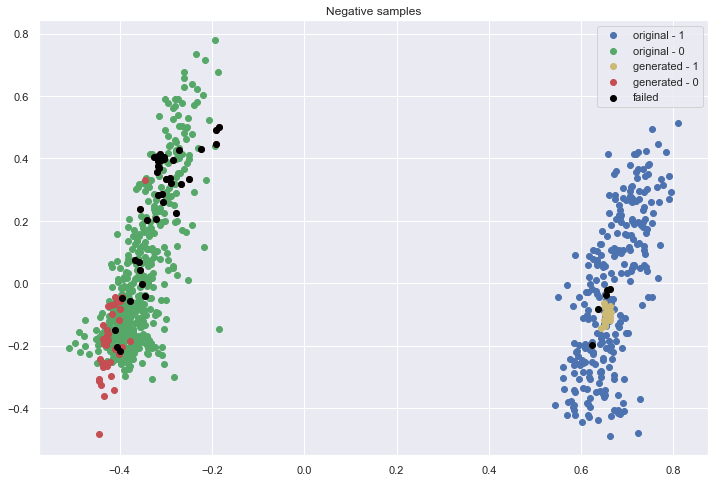

In [104]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_title('Negative samples')
ax.scatter(original_positive_emb[:,0], original_positive_emb[:,1],label='original - 1', c='b')
ax.scatter(original_negative_emb[:,0], original_negative_emb[:,1],label='original - 0', c='g')

ax.scatter(generated_positive_emb[:,0], generated_positive_emb[:,1],label='generated - 1', c='y')
ax.scatter(generated_negative_emb[:,0], generated_negative_emb[:,1],label='generated - 0', c='r')
ax.scatter(failed[:,0], failed[:,1],label='failed', c='black')
plt.legend()
plt.show()

In [105]:
generated_df['discriminator'].value_counts()

1    56
0    44
Name: discriminator, dtype: int64

In [106]:
tmp_generated = generated_df[generated_df['discriminator'].eq(1)]
tmp_generated = tmp_generated[tmp_generated['class'].eq(0)]
tmp_generated = tmp_generated.drop(columns=['discriminator', 'class'], axis=1)
tmp_generated

,preg,plas,pres,skin,insu,mass,pedi,age
3,2.0,69.0,44.0,26.0,0.0,37.0,0.0,23.0
8,2.0,82.0,48.0,54.0,0.0,50.0,-0.0,16.0
13,1.0,76.0,48.0,42.0,0.0,46.0,-0.0,20.0
14,2.0,69.0,45.0,25.0,0.0,36.0,0.0,23.0
17,0.0,80.0,50.0,74.0,0.0,59.0,0.0,11.0
20,2.0,70.0,49.0,38.0,0.0,39.0,0.0,16.0
21,2.0,85.0,65.0,3.0,0.0,25.0,0.0,25.0
22,2.0,76.0,58.0,23.0,0.0,31.0,0.0,20.0
23,2.0,69.0,47.0,49.0,0.0,42.0,-0.0,13.0
25,3.0,91.0,66.0,43.0,0.0,44.0,0.0,16.0


In [107]:
tmp_original = original_df
tmp_original = tmp_original[tmp_original['class'].eq(b'tested_negative')]
tmp_original = tmp_original.drop(columns=['class'], axis=1)
tmp_original

,preg,plas,pres,skin,insu,mass,pedi,age
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
5,5.0,116.0,74.0,0.0,0.0,25.6,0.201,30.0
7,10.0,115.0,0.0,0.0,0.0,35.3,0.134,29.0
10,4.0,110.0,92.0,0.0,0.0,37.6,0.191,30.0
...,...,...,...,...,...,...,...,...
762,9.0,89.0,62.0,0.0,0.0,22.5,0.142,33.0
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0


In [108]:
from sklearn.metrics.pairwise import euclidean_distances

In [109]:
euclidean_distances(X=tmp_original, Y=tmp_original).mean()

114.765257559751

In [110]:
generated_distances = euclidean_distances(X=tmp_generated, Y=tmp_original)
print(f'distances shape: {generated_distances.shape}')
generated_distances.mean()

distances shape: (36, 500)


102.47788760978322

In [111]:
df

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1
...,...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000,0
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000,0
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000,0
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333,1


In [122]:
columns = df.columns[:-1]

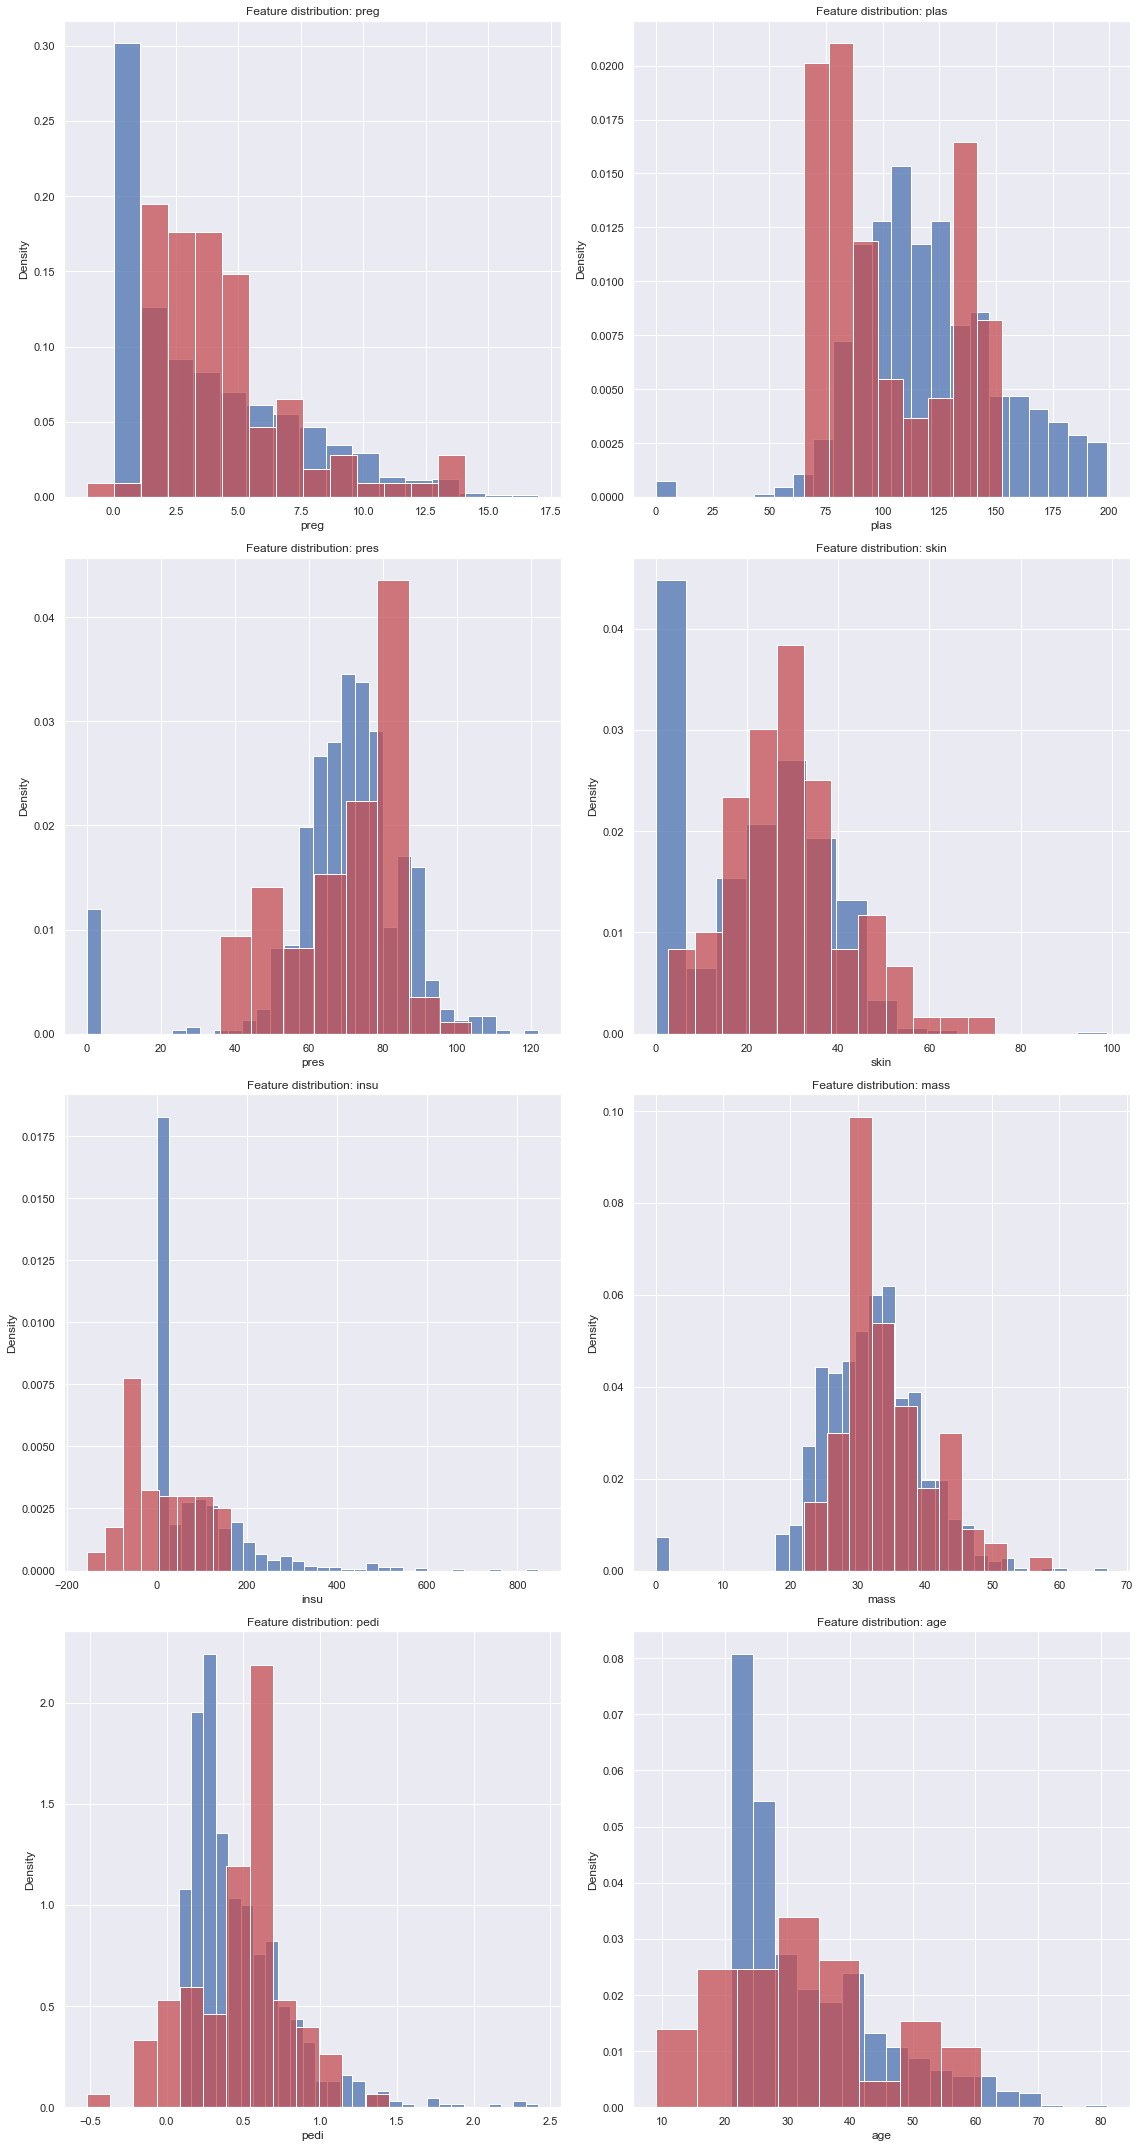

In [130]:
import seaborn as sns, numpy as np

sns.set_theme(); np.random.seed(0)

def plot_feature_dist(df, gen):
    fig, ax = plt.subplots(int(np.ceil(df.shape[1]/2)), 2, figsize=(16, 30))
    for i in range(len(columns)):
        column = columns.values[i]
        ax[i // 2, i % 2].set_title(f'Feature distribution: {column}')
        sns.histplot(df[column], label='Original', stat='density', ax=ax[i // 2, i % 2], color='b')
        sns.histplot(gen[column], label='Generated', stat='density', ax=ax[i // 2, i % 2], color='r')
    fig.tight_layout()
    plt.savefig('diabetes.png')
plot_feature_dist(pd.DataFrame(scaler.inverse_transform(df.values[:, :-1]), columns=columns), pd.DataFrame(scaler.inverse_transform(g_z[:, :-1]), columns=columns))

In [117]:
scaler.inverse_transform(df.values[:, :-1])

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

# German Credit

In [27]:
data = arff.loadarff('Assignment 4 files/german_credit.arff')
original_df = pd.DataFrame(data[0])
original_df

,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
0,b'A11',6.0,b'A34',b'A43',1169.0,b'A65',b'A75',4.0,b'A93',b'A101',...,b'A121',67.0,b'A143',b'A152',2.0,b'A173',1.0,b'A192',b'A201',b'1'
1,b'A12',48.0,b'A32',b'A43',5951.0,b'A61',b'A73',2.0,b'A92',b'A101',...,b'A121',22.0,b'A143',b'A152',1.0,b'A173',1.0,b'A191',b'A201',b'2'
2,b'A14',12.0,b'A34',b'A46',2096.0,b'A61',b'A74',2.0,b'A93',b'A101',...,b'A121',49.0,b'A143',b'A152',1.0,b'A172',2.0,b'A191',b'A201',b'1'
3,b'A11',42.0,b'A32',b'A42',7882.0,b'A61',b'A74',2.0,b'A93',b'A103',...,b'A122',45.0,b'A143',b'A153',1.0,b'A173',2.0,b'A191',b'A201',b'1'
4,b'A11',24.0,b'A33',b'A40',4870.0,b'A61',b'A73',3.0,b'A93',b'A101',...,b'A124',53.0,b'A143',b'A153',2.0,b'A173',2.0,b'A191',b'A201',b'2'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,b'A14',12.0,b'A32',b'A42',1736.0,b'A61',b'A74',3.0,b'A92',b'A101',...,b'A121',31.0,b'A143',b'A152',1.0,b'A172',1.0,b'A191',b'A201',b'1'
996,b'A11',30.0,b'A32',b'A41',3857.0,b'A61',b'A73',4.0,b'A91',b'A101',...,b'A122',40.0,b'A143',b'A152',1.0,b'A174',1.0,b'A192',b'A201',b'1'
997,b'A14',12.0,b'A32',b'A43',804.0,b'A61',b'A75',4.0,b'A93',b'A101',...,b'A123',38.0,b'A143',b'A152',1.0,b'A173',1.0,b'A191',b'A201',b'1'
998,b'A11',45.0,b'A32',b'A43',1845.0,b'A61',b'A73',4.0,b'A93',b'A101',...,b'A124',23.0,b'A143',b'A153',1.0,b'A173',1.0,b'A192',b'A201',b'2'


In [28]:
columns = original_df.columns

In [29]:
import re
for column in columns:
    if original_df[column].dtype == object:
        original_df[column] = original_df[column].apply(lambda x: x.decode("utf-8"))

In [30]:
data = arff.loadarff('Assignment 4 files/german_credit.arff')
df = pd.DataFrame(data[0])
df

,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
0,b'A11',6.0,b'A34',b'A43',1169.0,b'A65',b'A75',4.0,b'A93',b'A101',...,b'A121',67.0,b'A143',b'A152',2.0,b'A173',1.0,b'A192',b'A201',b'1'
1,b'A12',48.0,b'A32',b'A43',5951.0,b'A61',b'A73',2.0,b'A92',b'A101',...,b'A121',22.0,b'A143',b'A152',1.0,b'A173',1.0,b'A191',b'A201',b'2'
2,b'A14',12.0,b'A34',b'A46',2096.0,b'A61',b'A74',2.0,b'A93',b'A101',...,b'A121',49.0,b'A143',b'A152',1.0,b'A172',2.0,b'A191',b'A201',b'1'
3,b'A11',42.0,b'A32',b'A42',7882.0,b'A61',b'A74',2.0,b'A93',b'A103',...,b'A122',45.0,b'A143',b'A153',1.0,b'A173',2.0,b'A191',b'A201',b'1'
4,b'A11',24.0,b'A33',b'A40',4870.0,b'A61',b'A73',3.0,b'A93',b'A101',...,b'A124',53.0,b'A143',b'A153',2.0,b'A173',2.0,b'A191',b'A201',b'2'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,b'A14',12.0,b'A32',b'A42',1736.0,b'A61',b'A74',3.0,b'A92',b'A101',...,b'A121',31.0,b'A143',b'A152',1.0,b'A172',1.0,b'A191',b'A201',b'1'
996,b'A11',30.0,b'A32',b'A41',3857.0,b'A61',b'A73',4.0,b'A91',b'A101',...,b'A122',40.0,b'A143',b'A152',1.0,b'A174',1.0,b'A192',b'A201',b'1'
997,b'A14',12.0,b'A32',b'A43',804.0,b'A61',b'A75',4.0,b'A93',b'A101',...,b'A123',38.0,b'A143',b'A152',1.0,b'A173',1.0,b'A191',b'A201',b'1'
998,b'A11',45.0,b'A32',b'A43',1845.0,b'A61',b'A73',4.0,b'A93',b'A101',...,b'A124',23.0,b'A143',b'A153',1.0,b'A173',1.0,b'A192',b'A201',b'2'


In [31]:
columns = df.columns

In [32]:
import re
for column in columns:
    if df[column].dtype == object:
        df[column] = df[column].apply(lambda x: x.decode("utf-8"))
        df[column] = df[column].apply(lambda v: int(re.findall('[0-9]+', v)[0]))

In [33]:
df

,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
0,11,6.0,34,43,1169.0,65,75,4.0,93,101,...,121,67.0,143,152,2.0,173,1.0,192,201,1
1,12,48.0,32,43,5951.0,61,73,2.0,92,101,...,121,22.0,143,152,1.0,173,1.0,191,201,2
2,14,12.0,34,46,2096.0,61,74,2.0,93,101,...,121,49.0,143,152,1.0,172,2.0,191,201,1
3,11,42.0,32,42,7882.0,61,74,2.0,93,103,...,122,45.0,143,153,1.0,173,2.0,191,201,1
4,11,24.0,33,40,4870.0,61,73,3.0,93,101,...,124,53.0,143,153,2.0,173,2.0,191,201,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,14,12.0,32,42,1736.0,61,74,3.0,92,101,...,121,31.0,143,152,1.0,172,1.0,191,201,1
996,11,30.0,32,41,3857.0,61,73,4.0,91,101,...,122,40.0,143,152,1.0,174,1.0,192,201,1
997,14,12.0,32,43,804.0,61,75,4.0,93,101,...,123,38.0,143,152,1.0,173,1.0,191,201,1
998,11,45.0,32,43,1845.0,61,73,4.0,93,101,...,124,23.0,143,153,1.0,173,1.0,192,201,2


In [34]:

# class_col = df['21']
# df = df.drop(columns=['21'], axis=1)
scaler = MinMaxScaler((-1, 1))
scaler.fit(df.values)
df = pd.DataFrame(scaler.transform(df.values), columns=df.columns)
# df = pd.concat([df, class_col],axis=1)
df

,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
0,-1.000000,-0.941176,1.0,-0.983784,-0.898867,1.0,1.0,1.000000,0.333333,-1.0,...,-1.000000,0.714286,1.0,0.0,-0.333333,0.333333,-1.0,1.0,-1.0,-1.0
1,-0.333333,0.294118,0.0,-0.983784,-0.372620,-1.0,0.0,-0.333333,-0.333333,-1.0,...,-1.000000,-0.892857,1.0,0.0,-1.000000,0.333333,-1.0,-1.0,-1.0,1.0
2,1.000000,-0.764706,1.0,-0.967568,-0.796853,-1.0,0.5,-0.333333,0.333333,-1.0,...,-1.000000,0.071429,1.0,0.0,-1.000000,-0.333333,1.0,-1.0,-1.0,-1.0
3,-1.000000,0.117647,0.0,-0.989189,-0.160119,-1.0,0.5,-0.333333,0.333333,1.0,...,-0.333333,-0.071429,1.0,1.0,-1.000000,0.333333,1.0,-1.0,-1.0,-1.0
4,-1.000000,-0.411765,0.5,-1.000000,-0.491581,-1.0,0.0,0.333333,0.333333,-1.0,...,1.000000,0.214286,1.0,1.0,-0.333333,0.333333,1.0,-1.0,-1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.000000,-0.764706,0.0,-0.989189,-0.836470,-1.0,0.5,0.333333,-0.333333,-1.0,...,-1.000000,-0.571429,1.0,0.0,-1.000000,-0.333333,-1.0,-1.0,-1.0,-1.0
996,-1.000000,-0.235294,0.0,-0.994595,-0.603059,-1.0,0.0,1.000000,-1.000000,-1.0,...,-0.333333,-0.250000,1.0,0.0,-1.000000,1.000000,-1.0,1.0,-1.0,-1.0
997,1.000000,-0.764706,0.0,-0.983784,-0.939034,-1.0,1.0,1.000000,0.333333,-1.0,...,0.333333,-0.321429,1.0,0.0,-1.000000,0.333333,-1.0,-1.0,-1.0,-1.0
998,-1.000000,0.205882,0.0,-0.983784,-0.824475,-1.0,0.0,1.000000,0.333333,-1.0,...,1.000000,-0.857143,1.0,1.0,-1.000000,0.333333,-1.0,1.0,-1.0,1.0


In [35]:
import re

In [37]:
#Define the GAN and training parameters
noise_dim = 5
dim = 21
batch_size = 32

log_step = 100
epochs = 5000+1
learning_rate = 5e-4
models_dir= 'model_credit'

gan_args = [batch_size, learning_rate, noise_dim, df.shape[1], dim]
train_args = [models_dir, epochs, log_step]

model = GAN

#Training the GAN model chosen: Vanilla GAN, CGAN, DCGAN, etc.
synthesizer = model(gan_args)
history = synthesizer.train(df, train_args)

0 [D loss: 0.664775, acc.: 76.56%] [G loss: 0.751240]
generated_data
100 [D loss: 0.580704, acc.: 59.38%] [G loss: 0.694766]
generated_data
200 [D loss: 0.578118, acc.: 71.88%] [G loss: 0.943527]
generated_data
300 [D loss: 0.542069, acc.: 73.44%] [G loss: 1.381377]
generated_data
400 [D loss: 0.747901, acc.: 51.56%] [G loss: 1.045618]
generated_data
500 [D loss: 0.490326, acc.: 84.38%] [G loss: 1.220022]
generated_data
600 [D loss: 0.595883, acc.: 73.44%] [G loss: 1.198558]
generated_data
700 [D loss: 0.455314, acc.: 82.81%] [G loss: 1.124462]
generated_data
800 [D loss: 0.406026, acc.: 85.94%] [G loss: 1.235448]
generated_data
900 [D loss: 0.468732, acc.: 78.12%] [G loss: 1.256378]
generated_data
1000 [D loss: 0.537766, acc.: 71.88%] [G loss: 1.256702]
generated_data
1100 [D loss: 0.462055, acc.: 85.94%] [G loss: 1.229386]
generated_data
1200 [D loss: 0.358014, acc.: 89.06%] [G loss: 1.551944]
generated_data
1300 [D loss: 0.352184, acc.: 85.94%] [G loss: 1.436539]
generated_data
1400

In [38]:
from sklearn.decomposition import PCA

In [39]:
df

,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
0,-1.000000,-0.941176,1.0,-0.983784,-0.898867,1.0,1.0,1.000000,0.333333,-1.0,...,-1.000000,0.714286,1.0,0.0,-0.333333,0.333333,-1.0,1.0,-1.0,-1.0
1,-0.333333,0.294118,0.0,-0.983784,-0.372620,-1.0,0.0,-0.333333,-0.333333,-1.0,...,-1.000000,-0.892857,1.0,0.0,-1.000000,0.333333,-1.0,-1.0,-1.0,1.0
2,1.000000,-0.764706,1.0,-0.967568,-0.796853,-1.0,0.5,-0.333333,0.333333,-1.0,...,-1.000000,0.071429,1.0,0.0,-1.000000,-0.333333,1.0,-1.0,-1.0,-1.0
3,-1.000000,0.117647,0.0,-0.989189,-0.160119,-1.0,0.5,-0.333333,0.333333,1.0,...,-0.333333,-0.071429,1.0,1.0,-1.000000,0.333333,1.0,-1.0,-1.0,-1.0
4,-1.000000,-0.411765,0.5,-1.000000,-0.491581,-1.0,0.0,0.333333,0.333333,-1.0,...,1.000000,0.214286,1.0,1.0,-0.333333,0.333333,1.0,-1.0,-1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.000000,-0.764706,0.0,-0.989189,-0.836470,-1.0,0.5,0.333333,-0.333333,-1.0,...,-1.000000,-0.571429,1.0,0.0,-1.000000,-0.333333,-1.0,-1.0,-1.0,-1.0
996,-1.000000,-0.235294,0.0,-0.994595,-0.603059,-1.0,0.0,1.000000,-1.000000,-1.0,...,-0.333333,-0.250000,1.0,0.0,-1.000000,1.000000,-1.0,1.0,-1.0,-1.0
997,1.000000,-0.764706,0.0,-0.983784,-0.939034,-1.0,1.0,1.000000,0.333333,-1.0,...,0.333333,-0.321429,1.0,0.0,-1.000000,0.333333,-1.0,-1.0,-1.0,-1.0
998,-1.000000,0.205882,0.0,-0.983784,-0.824475,-1.0,0.0,1.000000,0.333333,-1.0,...,1.000000,-0.857143,1.0,1.0,-1.000000,0.333333,-1.0,1.0,-1.0,1.0


In [40]:
scalar = PCA(n_components=2, svd_solver='full')
scalar.fit(df.values)
X_embedded = scalar.transform(df.values)

In [41]:
import matplotlib.pyplot as plt
import numpy as np


# Setup parameters visualization parameters
seed = 17
test_size = 100 # number of fraud cases

np.random.seed(seed)
z = np.random.normal(size=(test_size, noise_dim))
real = synthesizer.get_data_batch(train=df, batch_size=test_size, seed=seed)
real_samples = pd.DataFrame(real)

In [42]:
models = {'GAN': ['GAN', False, synthesizer.generator]}

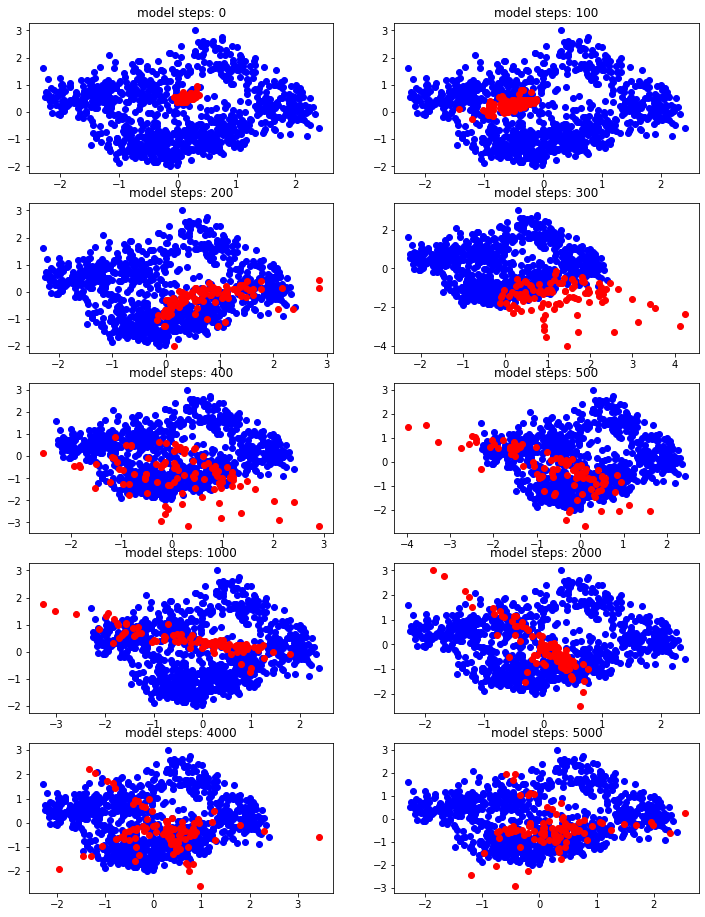

In [44]:
model_names = ['GAN']
colors = ['deepskyblue','blue']
markers = ['o','^']

col1, col2 = 'CITY', 'ETHNICITY'

base_dir = 'model/'

#Actual fraud data visualization
model_steps = [ 0, 100, 200, 300, 400, 500, 1000, 2000, 4000, 5000]
rows = len(model_steps)
columns = 5

axarr = [[]]*len(model_steps)



fig, ax = plt.subplots(5, 2, figsize=(12, 16))


for model_step_ix, model_step in enumerate(model_steps):      
    [model_name, with_class, generator_model] = models['GAN']
    generator_model.load_weights( base_dir + 'model_credit_generator_model_weights_step_'+str(model_step)+'.h5')
    g_z = generator_model.predict(z)
    g_z_emb = scalar.transform(g_z)
    ax[model_step_ix // 2, model_step_ix % 2].scatter(X_embedded[:,0], X_embedded[:,1], c='b')
    ax[model_step_ix // 2, model_step_ix % 2].scatter(g_z_emb[:, 0], g_z_emb[:, 1], c='r')
    ax[model_step_ix // 2, model_step_ix % 2].set_title(f'model steps: {model_step}')

In [45]:
A_columns = original_df.columns[original_df.dtypes == object][:-1]

In [46]:
A_columns

Index(['1', '3', '4', '6', '7', '9', '10', '12', '14', '15', '17', '19', '20'], dtype='object')

In [47]:
fooled_samples = scaler.inverse_transform(g_z)
generated_df = pd.DataFrame(fooled_samples)
# generated_df['20'] = g_z[:,-1]
generated_df.columns = original_df.columns
generated_df['discriminator'] = synthesizer.discriminator.predict(g_z)
generated_df['discriminator'] = generated_df['discriminator'].apply(lambda v: 1 if v > 0.5 else 0)
generated_df['21'] = generated_df['21'].apply(lambda v: 2 if v >= 1.5 else 1)
generated_df = generated_df.round()
generated_df[generated_df < 0] = 0
for a_column in A_columns:
    generated_df[a_column] = generated_df[a_column].apply(lambda v: f'A{int(v)}')
generated_df

,1,2,3,4,5,6,7,8,9,10,...,13,14,15,16,17,18,19,20,21,discriminator
0,A10,2.0,A32,A0,0.0,A60,A73,2.0,A92,A101,...,29.0,A143,A151,0.0,A173,1.0,A191,A201,1,0
1,A14,12.0,A34,A57,2997.0,A61,A72,4.0,A92,A101,...,33.0,A143,A152,2.0,A174,1.0,A191,A201,1,0
2,A14,15.0,A33,A43,1423.0,A62,A72,4.0,A92,A101,...,29.0,A143,A152,2.0,A174,1.0,A191,A201,1,0
3,A15,30.0,A31,A0,9029.0,A66,A70,5.0,A92,A101,...,60.0,A140,A152,0.0,A175,1.0,A192,A201,2,0
4,A12,49.0,A32,A35,5725.0,A61,A73,2.0,A92,A101,...,25.0,A143,A152,1.0,A173,1.0,A191,A201,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,A13,22.0,A32,A120,5354.0,A62,A73,3.0,A92,A101,...,40.0,A143,A152,2.0,A173,1.0,A191,A201,1,0
96,A12,3.0,A34,A51,2892.0,A61,A75,4.0,A93,A101,...,50.0,A143,A152,1.0,A174,1.0,A191,A201,1,0
97,A13,14.0,A31,A43,313.0,A64,A73,3.0,A92,A101,...,42.0,A143,A151,2.0,A173,1.0,A191,A201,1,0
98,A11,59.0,A33,A0,2634.0,A60,A72,2.0,A91,A100,...,27.0,A143,A152,2.0,A173,1.0,A191,A201,2,0


In [48]:
fooled_samples[:, -1]

array([0.9972884 , 1.1036994 , 0.91657656, 2.398571  , 2.0037591 ,
       0.96761787, 1.1849025 , 2.0767627 , 2.2057462 , 1.7448723 ,
       0.9929752 , 1.0330775 , 1.9695132 , 0.73573065, 1.2088625 ,
       1.1447054 , 1.1388941 , 1.0867697 , 0.8515784 , 1.1007622 ,
       1.1493331 , 0.9795338 , 1.5921302 , 0.7430677 , 1.0043758 ,
       2.142634  , 1.0089625 , 1.2313721 , 1.0425478 , 1.2953213 ,
       1.1885113 , 1.1628529 , 1.4944081 , 1.1383959 , 1.0739758 ,
       1.9322404 , 0.7595139 , 1.8031535 , 1.2664963 , 1.008532  ,
       1.2240725 , 0.77951485, 0.9978826 , 1.3386701 , 1.5069468 ,
       1.068377  , 1.2335142 , 1.2219783 , 0.90574324, 1.7311528 ,
       1.08615   , 1.7401042 , 1.0947185 , 0.8794163 , 1.0391932 ,
       1.3804973 , 1.491791  , 2.4694302 , 1.9103893 , 1.0156794 ,
       1.2602957 , 0.9905689 , 1.0613832 , 1.1423095 , 1.1794734 ,
       1.1458898 , 0.8722719 , 1.11407   , 1.1121522 , 1.0627618 ,
       2.251008  , 0.9805478 , 0.66510594, 0.9400073 , 1.16574

In [49]:
original_df

,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
0,A11,6.0,A34,A43,1169.0,A65,A75,4.0,A93,A101,...,A121,67.0,A143,A152,2.0,A173,1.0,A192,A201,1
1,A12,48.0,A32,A43,5951.0,A61,A73,2.0,A92,A101,...,A121,22.0,A143,A152,1.0,A173,1.0,A191,A201,2
2,A14,12.0,A34,A46,2096.0,A61,A74,2.0,A93,A101,...,A121,49.0,A143,A152,1.0,A172,2.0,A191,A201,1
3,A11,42.0,A32,A42,7882.0,A61,A74,2.0,A93,A103,...,A122,45.0,A143,A153,1.0,A173,2.0,A191,A201,1
4,A11,24.0,A33,A40,4870.0,A61,A73,3.0,A93,A101,...,A124,53.0,A143,A153,2.0,A173,2.0,A191,A201,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12.0,A32,A42,1736.0,A61,A74,3.0,A92,A101,...,A121,31.0,A143,A152,1.0,A172,1.0,A191,A201,1
996,A11,30.0,A32,A41,3857.0,A61,A73,4.0,A91,A101,...,A122,40.0,A143,A152,1.0,A174,1.0,A192,A201,1
997,A14,12.0,A32,A43,804.0,A61,A75,4.0,A93,A101,...,A123,38.0,A143,A152,1.0,A173,1.0,A191,A201,1
998,A11,45.0,A32,A43,1845.0,A61,A73,4.0,A93,A101,...,A124,23.0,A143,A153,1.0,A173,1.0,A192,A201,2


In [50]:
class_col = generated_df['21']
tmp = generated_df.drop(columns=['21' ,'discriminator'], axis=1)
tmp = pd.DataFrame(g_z[:,:-1], columns=df.columns[:-1])
tmp = pd.concat([tmp, class_col],axis=1)
tmp

,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
0,-1.492115,-1.047006,-0.014234,-1.317293,-1.033400,-1.491882,0.004868,-0.593277,-0.205216,-1.388639,...,0.790713,-0.651927,1.258289,-1.031944,-1.601539,0.449818,-1.447016,-1.254428,-1.443080,1
1,1.044946,-0.768511,0.801654,-0.910576,-0.697683,-0.753026,-0.406497,0.821988,-0.391760,-0.739755,...,0.524973,-0.489268,0.754828,-0.052781,-0.025454,1.035284,-0.800731,-0.764657,-0.729128,1
2,0.993782,-0.675534,0.516685,-0.984868,-0.870911,-0.297371,-0.267702,0.674969,-0.302912,-0.952395,...,0.077281,-0.628332,0.743155,-0.219560,-0.311069,1.208543,-1.088363,-0.955732,-0.998256,1
3,1.888475,-0.227358,-0.684665,-1.760447,-0.033936,1.678417,-1.498227,1.797377,-0.606127,-1.400656,...,-1.495031,0.464804,-1.871013,0.186594,-1.594097,1.551496,-1.631741,1.930991,-1.644256,2
4,-0.254517,0.311691,-0.050163,-1.027034,-0.397460,-0.834885,-0.061500,-0.435160,-0.343632,-1.012892,...,-0.935630,-0.772331,0.885628,-0.016878,-0.963484,0.298615,-0.867276,-0.965750,-0.902604,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.088181,-0.460750,0.031175,-0.570040,-0.438297,-0.288746,0.106788,0.269245,-0.054053,-0.523960,...,-0.132257,-0.233995,0.586403,-0.328353,-0.326638,0.382186,-0.536299,-0.433506,-0.491003,1
96,-0.049842,-1.029881,0.978476,-0.938024,-0.709277,-1.101843,0.842165,0.715428,0.460151,-1.131200,...,-0.530132,0.103257,1.219693,0.167257,-0.775122,0.840502,-1.415060,-0.655670,-1.137928,1
97,0.537452,-0.705860,-0.254127,-0.984570,-0.993063,0.251241,0.095364,0.379630,-0.309367,-0.974956,...,-0.616703,-0.185141,1.133051,-0.973975,-0.443618,0.540868,-1.139756,-1.041456,-0.990585,1
98,-0.980371,0.609280,0.653212,-1.479813,-0.737594,-1.375898,-0.673072,-0.299958,-1.246735,-1.513834,...,-0.557287,-0.701401,1.164355,0.149936,-0.332065,0.107276,-1.274977,-1.129652,-1.461446,2


In [51]:
original_df

,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
0,A11,6.0,A34,A43,1169.0,A65,A75,4.0,A93,A101,...,A121,67.0,A143,A152,2.0,A173,1.0,A192,A201,1
1,A12,48.0,A32,A43,5951.0,A61,A73,2.0,A92,A101,...,A121,22.0,A143,A152,1.0,A173,1.0,A191,A201,2
2,A14,12.0,A34,A46,2096.0,A61,A74,2.0,A93,A101,...,A121,49.0,A143,A152,1.0,A172,2.0,A191,A201,1
3,A11,42.0,A32,A42,7882.0,A61,A74,2.0,A93,A103,...,A122,45.0,A143,A153,1.0,A173,2.0,A191,A201,1
4,A11,24.0,A33,A40,4870.0,A61,A73,3.0,A93,A101,...,A124,53.0,A143,A153,2.0,A173,2.0,A191,A201,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12.0,A32,A42,1736.0,A61,A74,3.0,A92,A101,...,A121,31.0,A143,A152,1.0,A172,1.0,A191,A201,1
996,A11,30.0,A32,A41,3857.0,A61,A73,4.0,A91,A101,...,A122,40.0,A143,A152,1.0,A174,1.0,A192,A201,1
997,A14,12.0,A32,A43,804.0,A61,A75,4.0,A93,A101,...,A123,38.0,A143,A152,1.0,A173,1.0,A191,A201,1
998,A11,45.0,A32,A43,1845.0,A61,A73,4.0,A93,A101,...,A124,23.0,A143,A153,1.0,A173,1.0,A192,A201,2


In [52]:
pca = PCA(n_components=2, svd_solver='full')
original_emb = pca.fit_transform(df)
generated_positive_emb = pca.transform(tmp[tmp['21'].eq(2)])
generated_negative_emb = pca.transform(tmp[tmp['21'].eq(1)])
original_positive_emb = original_emb[original_df[original_df['21'].eq('2')].index.values]
original_negative_emb = original_emb[original_df[original_df['21'].eq('1')].index.values]
failed = pca.transform(tmp.iloc[generated_df[generated_df['discriminator'].eq(0)].index])

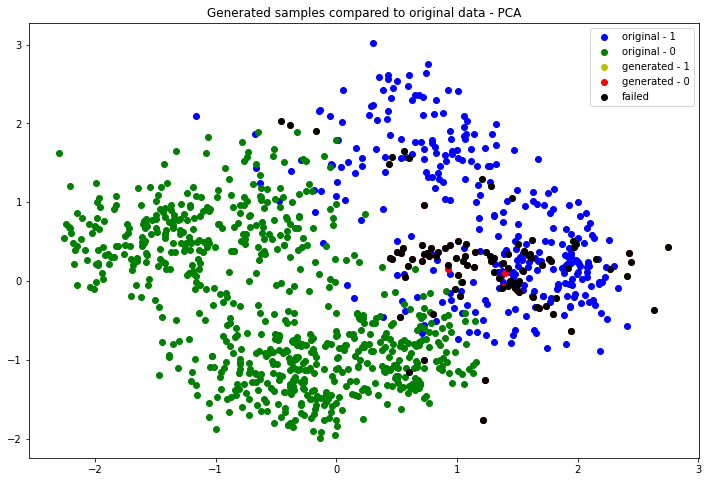

In [53]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_title('Generated samples compared to original data - PCA')
ax.scatter(original_positive_emb[:,0], original_positive_emb[:,1],label='original - 1', c='b')
ax.scatter(original_negative_emb[:,0], original_negative_emb[:,1],label='original - 0', c='g')

ax.scatter(generated_positive_emb[:,0], generated_positive_emb[:,1],label='generated - 1', c='y')
ax.scatter(generated_negative_emb[:,0], generated_negative_emb[:,1],label='generated - 0', c='r')
ax.scatter(failed[:,0], failed[:,1],label='failed', c='black')
plt.legend()
plt.show()

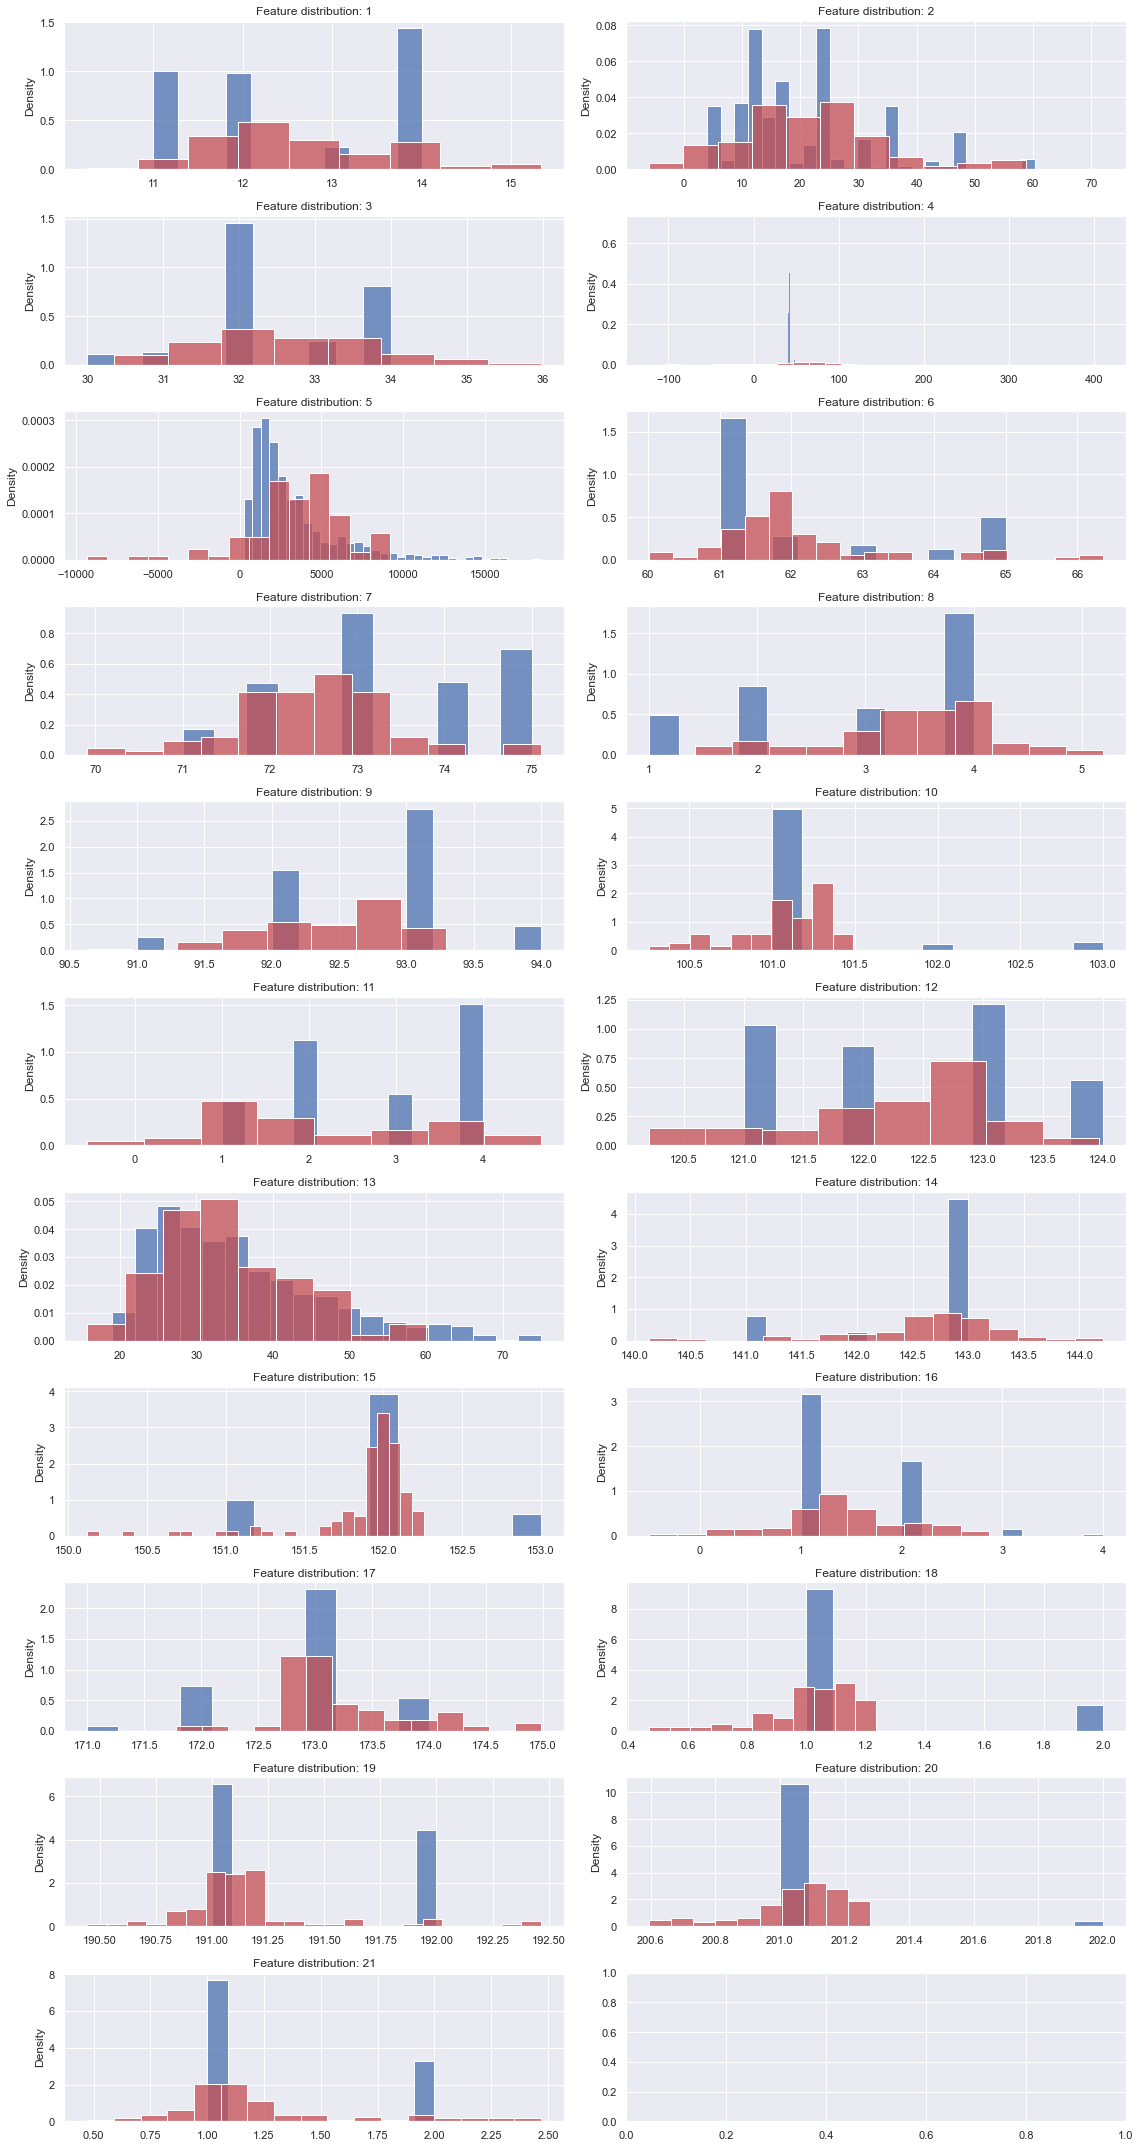

In [87]:
import seaborn as sns, numpy as np

sns.set_theme(); np.random.seed(0)

def plot_feature_dist(df, gen):
    fig, ax = plt.subplots(int(np.ceil(df.shape[1]/2)), 2, figsize=(16, 30))
    for column in range(df.shape[1]):
        ax[column // 2, column % 2].set_title(f'Feature distribution: {column + 1}')
        sns.histplot(df[:, column], label='Original', stat='density', ax=ax[column // 2, column % 2], color='b')
        sns.histplot(gen[:, column], label='Generated', stat='density', ax=ax[column // 2, column % 2], color='r')
    fig.tight_layout()
    plt.savefig('german_credit.png')
plot_feature_dist(scaler.inverse_transform(df.values), scaler.inverse_transform(g_z))

# PART 2

In [132]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


In [133]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], test_size=0.30, random_state=42)
print(f'train shape: {X_train.shape}')
print(f'test shape: {X_test.shape}')

train shape: (537, 8)
test shape: (231, 8)


In [134]:
clf = RandomForestClassifier(max_depth=3, random_state=0)
clf.fit(X_train.values, y_train.values)

RandomForestClassifier(max_depth=3, random_state=0)

In [135]:
from tensorflow.keras.layers import Concatenate
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam

class Generator_RF():
    def __init__(self, batch_size, C):
        self.batch_size = batch_size
        self.C = C

    def build_model(self, input_shape, dim, data_dim):
        input_Z = Input(shape=input_shape, batch_size=self.batch_size)
        input_C = Input(shape=1, batch_size=self.batch_size)
        x = Concatenate(axis=1)([input_Z, input_C])
        x = Dense(dim * 2, activation='relu')(x)
        x = Dense(dim * 4, activation='relu')(x)
        x = Dense(data_dim)(x)
        return Model(inputs=[input_Z, input_C], outputs=x)

In [136]:
class Discriminator_RF():
    def __init__(self, batch_size, C):
        self.batch_size = batch_size
        self.C = C

    def build_model(self, input_shape, dim):
        input_sample = Input(shape=input_shape, batch_size=self.batch_size)
        input_Y = Input(shape=1, batch_size=self.batch_size)
        input_C = Input(shape=1, batch_size=self.batch_size)
        x = Concatenate(axis=1)([input_sample, input_Y, input_C])
        x = Dense(dim * 4, activation='relu')(x)
        x = Dropout(0.1)(x)
        x = Dense(dim * 2, activation='relu')(x)
        x = Dropout(0.1)(x)
        x = Dense(dim, activation='relu')(x)
        x = Dense(1, activation='sigmoid')(x)
        return Model(inputs=[input_sample, input_Y, input_C], outputs=x)

In [137]:
import tensorflow as tf
class GAN_RF():

    def __init__(self, gan_args):
        [self.batch_size, lr, self.noise_dim,
         self.data_dim, layers_dim, self.C] = gan_args

        self.generator = Generator_RF(self.batch_size, self.C). \
            build_model(input_shape=(self.noise_dim,), dim=layers_dim, data_dim=self.data_dim)

        self.discriminator = Discriminator_RF(self.batch_size, self.C). \
            build_model(input_shape=(self.data_dim,), dim=layers_dim)

        optimizer = Adam(lr, 0.5)

        # Build and compile the discriminator
        self.discriminator.compile(loss='binary_crossentropy',
                                   optimizer=optimizer,
                                   metrics=['accuracy'])

        # The generator takes noise as input and generates imgs
        z = Input(shape=(self.noise_dim,))
        c = Input(shape=(1,))
        record = self.generator([z, c])

        # For the combined model we will only train the generator
        self.discriminator.trainable = False
        y = Input(shape=(1,))
        # The discriminator takes generated images as input and determines validity
        validity = self.discriminator([record, y, c])

        # The combined model  (stacked generator and discriminator)
        # Trains the generator to fool the discriminator
        self.combined = Model([z, y,c], validity)
        self.combined.compile(loss='binary_crossentropy', optimizer=optimizer)

    def get_data_batch(self, train, batch_size, seed=0):
        # # random sampling - some samples will have excessively low or high sampling, but easy to implement
        # np.random.seed(seed)
        # x = train.loc[ np.random.choice(train.index, batch_size) ].values
        # iterate through shuffled indices, so every sample gets covered evenly

        start_i = (batch_size * seed) % len(train)
        stop_i = start_i + batch_size
        shuffle_seed = (batch_size * seed) // len(train)
        np.random.seed(shuffle_seed)
        train_ix = np.random.choice(list(train.index), replace=False, size=len(train))  # wasteful to shuffle every time
        train_ix = list(train_ix) + list(train_ix)  # duplicate to cover ranges past the end of the set
        x = train.loc[train_ix[start_i: stop_i]].values
        return np.reshape(x, (batch_size, -1))

    def train(self, data, train_arguments):
        [cache_prefix, epochs, sample_interval] = train_arguments

        data_cols = data.columns

        # Adversarial ground truths
        valid = np.ones((self.batch_size, 1))
        fake = np.zeros((self.batch_size, 1))
        # C = np.full((self.batch_size, 1), 0.8)
        history = {'D_loss': [],
                   'D_acc': [],
                   'G_loss': []}
        for epoch in range(epochs):
            # ---------------------
            #  Train Discriminator
            # ---------------------
            C = np.random.uniform(0, 1, self.batch_size)
            batch_data = self.get_data_batch(data, self.batch_size)
            noise = tf.random.normal((self.batch_size, self.noise_dim))

            # Generate a batch of new images
            gen_data = self.generator.predict([noise, C])
            batch_x = batch_data[:,:-1]
            bb_y = clf.predict_proba(batch_x)
            # Train the discriminator
            bb_gen_data_y = clf.predict_proba(gen_data[:,:-1])
            d_loss_real = self.discriminator.train_on_batch([batch_data, bb_y[:,0], C], valid)
            d_loss_fake = self.discriminator.train_on_batch([gen_data, bb_gen_data_y[:,0], C], fake)
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

            # ---------------------
            #  Train Generator
            # ---------------------
            noise = tf.random.normal((self.batch_size, self.noise_dim))
            # Train the generator (to have the discriminator label samples as valid)
            g_loss = self.combined.train_on_batch([noise, valid, C], valid)
            
            if epoch % 100 == 0:
                # Plot the progress
                print("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100 * d_loss[1], g_loss))
            history['D_loss'].append(d_loss[0])
            history['D_acc'].append(100 * d_loss[1])
            history['G_loss'].append(g_loss)
            # If at save interval => save generated events
            if epoch % sample_interval == 0:
                # Test here data generation step
                # save model checkpoints
                model_checkpoint_base_name = 'model/' + cache_prefix + '_{}_model_weights_step_{}.h5'
                self.generator.save_weights(model_checkpoint_base_name.format('generator', epoch))
                self.discriminator.save_weights(model_checkpoint_base_name.format('discriminator', epoch))

        return history

    def save(self, path, name):
        assert os.path.isdir(path) == True, \
            "Please provide a valid path. Path must be a directory."
        model_path = os.path.join(path, name)
        self.generator.save_weights(model_path)  # Load the generator
        return

    def load(self, path):
        assert os.path.isdir(path) == True, \
            "Please provide a valid path. Path must be a directory."
        self.generator = Generator(self.batch_size)
        self.generator = self.generator.load_weights(path)
        return self.generator

In [138]:
#Define the GAN and training parameters
noise_dim = 5
dim = 10
batch_size = 32

log_step = 100
epochs = 5000+1
learning_rate = 5e-4
models_dir = 'model_diabetes'
C = 0.7

gan_args = [batch_size, learning_rate, noise_dim, df.shape[1], dim, C]
train_args = ['', epochs, log_step]

model = GAN_RF

#Training the GAN model chosen: Vanilla GAN, CGAN, DCGAN, etc.
synthesizer = model(gan_args)

In [139]:
history = synthesizer.train(df, train_args)

0 [D loss: 0.714647, acc.: 25.00%] [G loss: 0.664448]
100 [D loss: 0.681609, acc.: 65.62%] [G loss: 0.671589]
200 [D loss: 0.701140, acc.: 37.50%] [G loss: 0.642960]
300 [D loss: 0.691341, acc.: 56.25%] [G loss: 0.660041]
400 [D loss: 0.684326, acc.: 51.56%] [G loss: 0.677648]
500 [D loss: 0.693637, acc.: 53.12%] [G loss: 0.673261]
600 [D loss: 0.676910, acc.: 59.38%] [G loss: 0.707963]
700 [D loss: 0.689078, acc.: 51.56%] [G loss: 0.675444]
800 [D loss: 0.686399, acc.: 60.94%] [G loss: 0.691059]
900 [D loss: 0.694490, acc.: 54.69%] [G loss: 0.679596]
1000 [D loss: 0.681483, acc.: 59.38%] [G loss: 0.683804]
1100 [D loss: 0.682048, acc.: 62.50%] [G loss: 0.688540]
1200 [D loss: 0.680182, acc.: 50.00%] [G loss: 0.690261]
1300 [D loss: 0.682162, acc.: 50.00%] [G loss: 0.702602]
1400 [D loss: 0.673044, acc.: 54.69%] [G loss: 0.733167]
1500 [D loss: 0.655297, acc.: 62.50%] [G loss: 0.714248]
1600 [D loss: 0.682042, acc.: 54.69%] [G loss: 0.684961]
1700 [D loss: 0.656530, acc.: 65.62%] [G lo

In [140]:
from sklearn.decomposition import PCA

In [141]:
scalar = PCA(n_components=2, svd_solver='full')
scalar.fit(df.values)
X_embedded = scalar.transform(df.values)

In [142]:
import matplotlib.pyplot as plt
import numpy as np


# Setup parameters visualization parameters
seed = 17
test_size = 500 # number of fraud cases

np.random.seed(seed)
z = np.random.normal(size=(test_size, noise_dim))
real = synthesizer.get_data_batch(train=df, batch_size=test_size, seed=seed)
real_samples = pd.DataFrame(real)

In [143]:
models = {'GAN': ['GAN', False, synthesizer.generator]}

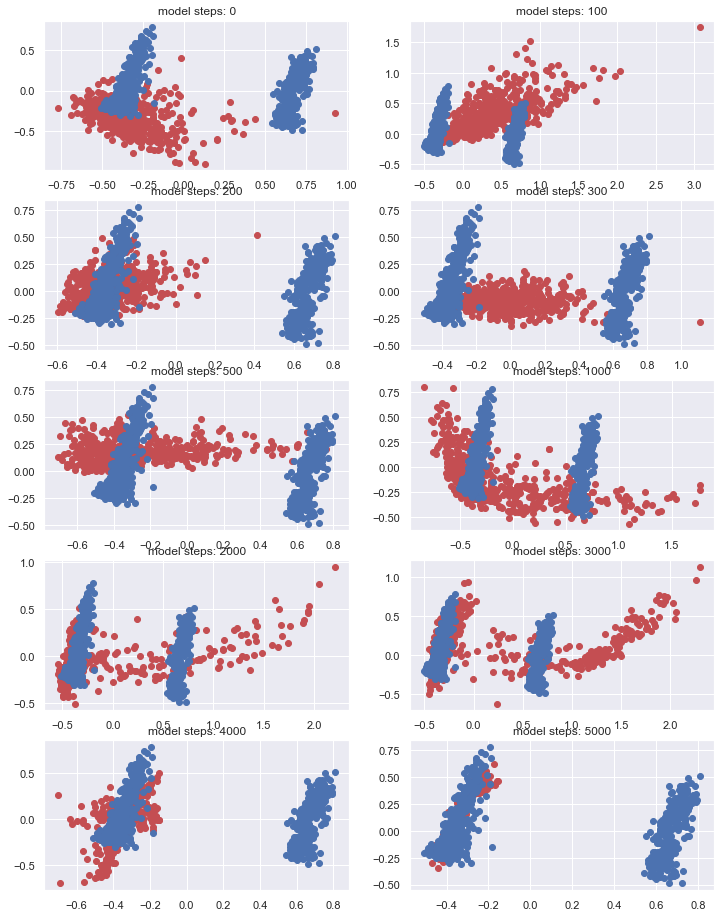

In [144]:
model_names = ['GAN']
colors = ['deepskyblue','blue']
markers = ['o','^']

col1, col2 = 'CITY', 'ETHNICITY'

base_dir = 'model/'

#Actual fraud data visualization
model_steps = [ 0, 100, 200, 300, 500, 1000, 2000, 3000, 4000, 5000]
rows = len(model_steps)
columns = 5

axarr = [[]]*len(model_steps)



fig, ax = plt.subplots(5, 2, figsize=(12, 16))


for model_step_ix, model_step in enumerate(model_steps):      
    [model_name, with_class, generator_model] = models['GAN']
    generator_model.load_weights( base_dir + '_generator_model_weights_step_'+str(model_step)+'.h5')
    g_z = generator_model.predict([z, np.random.uniform(0, 1, 500)])
    g_z_emb = scalar.transform(g_z)
    ax[model_step_ix // 2, model_step_ix % 2].scatter(g_z_emb[:, 0], g_z_emb[:, 1], c='r')
    ax[model_step_ix // 2, model_step_ix % 2].scatter(X_embedded[:,0], X_embedded[:,1], c='b')
    ax[model_step_ix // 2, model_step_ix % 2].set_title(f'model steps: {model_step}')

In [145]:
import numpy as np

In [193]:
df

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1
...,...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000,0
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000,0
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000,0
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333,1


In [197]:
scalar = PCA(n_components=2, svd_solver='full')
scalar.fit(df.values)
X_embedded_1 = scalar.transform(df[df['class'].eq(1)].values)
X_embedded_2 = scalar.transform(df[df['class'].eq(0)].values)

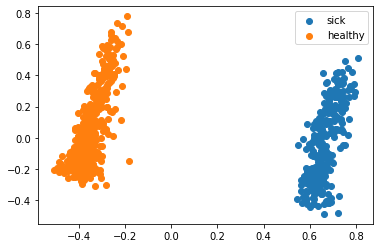

In [200]:
plt.scatter(X_embedded_1[:, 0], X_embedded_1[:, 1], label='sick')
plt.scatter(X_embedded_2[:, 0], X_embedded_2[:, 1], label='healthy')


plt.legend()
plt.show()